In [1]:
key_lib = True
if key_lib == True:
    from Process_Function import *
    from Function.write_txt import *
    from time import time
    import shutil
    key_lib = False
else:
    print('Đã chạy trước đó')

The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.


In [4]:
# Phần ghép các Function
Audio_Input = 'Input/29071206.wav'

def main(Audio_Input):
    if 'wav' not in Audio_Input:
        Audio_wav = Audio_Input.replace('.m4a','.wav')
        if os.path.exists(Audio_wav):
            os.remove(Audio_wav)
        Audio = AudioSegment.from_file(Audio_Input,'m4a')
        Audio.export(Audio_wav,'wav')
        Audio_Input = Audio_wav

    Thu_muc_cho_audio_cat_theo_giong_noi = 'Splited_speaker'
    Thu_muc_cho_audio_cat_theo_silence   = 'Splited_Silence'
    Name = Audio_Input.split('/')[-1]
    if os.path.exists(Thu_muc_cho_audio_cat_theo_giong_noi + '/' +Name.replace('.wav','')):
        shutil.rmtree(Thu_muc_cho_audio_cat_theo_giong_noi + '/' +Name.replace('.wav',''), ignore_errors=True)
    if os.path.exists(Thu_muc_cho_audio_cat_theo_silence   + '/' +Name.replace('.wav','')):
        shutil.rmtree(Thu_muc_cho_audio_cat_theo_silence + '/' +Name.replace('.wav',''), ignore_errors=True)

    process_time = [time()]

    '''Speaker'''
    Speaker,hashDict = Split_speaker(Audio_Input, time_ok=True)
    # # write_Speaker_txt(Speaker,Audio_Input)
    # write_Speaker_txt(hashDict,Audio_Input)
    process_time.append(time())

    '''Silent'''
    My_info = []
    My_info_list = []
    for audio,speaker in hashDict.items():
        my_dict,alist = split_silence(audio,speaker,silence_time=700,set_channel=True)
        My_info.append(my_dict)
        My_info_list.append(alist)
    process_time.append(time())

    '''Google'''
    # My_info = Process(My_info,My_info_list,time=20)
    Text_Dict=GCP_s2t(My_info)
    Result = Handle_Text_Dict(Text_Dict,XD=False)
    # Result2 = Handle_Text_Dict(Text_Dict2,XD=False)
    # Result2 = Handle_Text_Dict(Text_Dict,S_Punc_ok=True)
    process_time.append(time())

    '''Syntax'''
    try:
        _,final_text=process_input(Result)
        # _,final_text2=process_input(Result2)
    except:
        final_text=process_input(Result)
        # final_text2=process_input(Result2)
    process_time.append(time())

    '''Write Doc'''
    # Name = Audio_Input.split('/')[-1]
    # Name.replace('.wav','Xuong_dong')
    # downline(final_text)
    Create_Word(Audio_Input,final_text)
    # Audio_Input.replace('.wav','2.wav')
    # Create_Word(Audio_Input,final_text2)

'''print time of processing'''
process_time = [process_time[i+1] - process_time[i] for i in range(len(process_time)-1)]
pr_time = ''
for i in process_time:
    pr_time += "{:7.4f} || ".format(i)
print(pr_time)
del pr_time

'''print final text'''
for i in final_text:
    print(i)

Splited_Silence\29071206/0/file_0.wav
22.9957 || 16.2931 || 50.1678 ||  1.5588 || 
Vô danh: xin mời đồng chí ta 
Vô danh: ngày 13/6 Bộ Chỉ huy Bộ đội biên phòng Bà Rịa Vũng Tàu cho biết qua hai ngày 11 và 12/6 Thực hiện kế hoạch tuần tra bảo vệ chủ quyền vùng biển và phối hợp Bảo An ninh an toàn đường ống dẫn khí Nam Côn Sơn lực lượng Biên phòng và công ty đường ống khí Nam Côn Sơn đã phát hiện 12 Vụ việc với 17 Phương tiện đang Neo Đậu đánh bắt thủy sản trong và cận kề hành lang an toàn đường ống dẫn khí dưới biển theo đó tổ tuần tra tàu biên phòng 13 98012 đội biên phòng 2 bộ đội biên phòng Bà Rịa Vũng Tàu đã tuần tra dọc hành lang an toàn đường ống khí Nam Côn Sơn từ buồn đến remix 9775 và ngược lại
Vô danh: xin mời đồng chí loại
Đồng chí Loại: ngày 13/6 Bộ Chỉ huy Bộ đội biên phòng Bà Rịa Vũng Tàu cho biết qua hai ngày 11 và 12 tháng 6 Thực hiện kế hoạch tuần tra bảo vệ chủ quyền vùng biển và phối hợp an ninh an toàn đường ống dẫn khí Nam Côn Sơn lực lượng Biên phòng và công ty đườ

In [27]:
# import wave
# import numpy as np
# import matplotlib.pyplot as plt
# def function(audio):
#     wav_obj = wave.open(audio, 'rb')
#     sample_freq = wav_obj.getframerate()
#     n_samples = wav_obj.getnframes()
#     print('Channels : ',wav_obj.getnchannels())
#     t_audio = n_samples/sample_freq
#     signal_wave = wav_obj.readframes(n_samples)
    
#     signal_array = np.frombuffer(signal_wave, dtype=np.int16)
#     l_channel = signal_array[0::2]
#     r_channel = signal_array[1::2]
    
#     times = np.linspace(0, n_samples/sample_freq, num=n_samples)
    

#     plt.subplots(figsize=(15, 5))
#     plt.subplot(4,1,1)
#     plt.plot(times, l_channel)
#     # plt.title('Left Channel')
#     # plt.ylabel('Signal Value')
#     # plt.xlabel('Time (s)')
#     plt.xlim(0, t_audio)

#     plt.subplot(4,1,2)
#     plt.plot(times, r_channel)
#     # plt.title('Right Channel')
#     # plt.ylabel('Signal Value')
#     # plt.xlabel('Time (s)')
#     plt.xlim(0, t_audio)

    
#     plt.subplot(4,1,3)
#     plt.specgram(l_channel, Fs=sample_freq, vmin=-20, vmax=50)
#     # plt.title('Left Channel')
#     # plt.ylabel('Frequency (Hz)')
#     # plt.xlabel('Time (s)')
#     plt.xlim(0, t_audio)
#     plt.colorbar()

#     plt.subplot(4,1,4)
#     plt.specgram(r_channel, Fs=sample_freq, vmin=-20, vmax=50)
#     # plt.title('right Channel')
#     # plt.ylabel('Frequency (Hz)')
#     # plt.xlabel('Time (s)')
#     plt.xlim(0, t_audio)
#     plt.colorbar()


Channels :  2


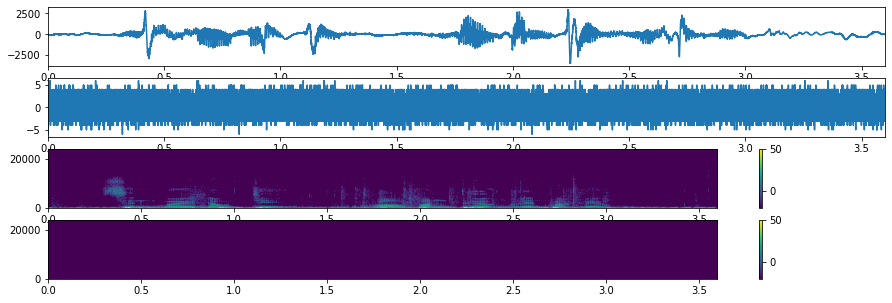

In [28]:
# function(r'Input\Sound Recordings\Recording (2).wav')

In [ ]:
# # Xem Thời gian cắt khoảng im lặng
# for i in My_info_list:
#     time = 0
#     for j in i:
#         time += j[2]-j[1]
#         print("{:7.3f} || {:^42}||{:^7.4f}||{:7.4f}||{}".format(time,j[0],j[2]-j[1],j[3]-j[4],j[5]))
#     #     print(j)
#     # print(i)

In [ ]:
# print(My_info)

In [ ]:
# print(Text_Dict.keys())
# print('\nText_Dict[\'Speaker\']  :',Text_Dict['Speaker'])
# print('\nText_Dict[\'co dau\']   :',Text_Dict['co dau'])
# print('\nText_Dict[\'khong dau\']:',Text_Dict['khong dau'])
# print('\nText_Dict[\'silence\']  :',Text_Dict['silence'][0:5])
# print(Text_Dict['co dau'])

In [ ]:
## Kiểm tra Xuong dong
# for Speaker,codau,kdau,sil in zip(Text_Dict['Speaker'],Text_Dict['co dau'],Text_Dict['khong dau'],Text_Dict['silence']):
#     print("{:^10}||{}||{}".format(Speaker,sil,kdau))

In [ ]:
# print(Result.keys())
# print('\nResult[\'Speaker\']  :',Result['Speaker'][:])
# print('\nResult[\'co dau\']   :',Result['co dau'][:])
# print('\nResult[\'khong dau\']:',Result['khong dau'][:])
# # with open('Result.txt','w+',encoding='utf-8') as f:
# #     f.write(str(Result))

In [ ]:
# with open(r'D:\Work_Space\s2t_GCP_Pycharm\Result.txt','w+',encoding='utf-8') as f:
#     f.write(str(Result))

In [ ]:
# def recognize(conser):

#     def capital(noun):
#         return ' '.join([str(wordx).capitalize() for wordx in noun.split()])

#     final = conser
#     military_rank = ['đại tướng', 'trung tướng', 'thiếu tướng', 'đại tá','thượng tá', 'trung tá', 'thiếu tá', 'đại úy', 'thượng úy', 'trung úy', 'thiếu úy']
#     start_para = [ 'xin trân trọng kính','tôi xin kính','xin kính','tôi xin', 'xin', 'kính','tôi']
#     vocative = ['đồng chí', 'đại biểu']
#     checkpoint_start = ['phát biểu','đặt câu hỏi','trả lời','cho ý kiến','nêu ý kiến']
#     end_para = ['tôi xin báo cáo hết', 'xin phép báo cáo hết' ,'xin báo cáo hết'
#                , 'xin phép hết','báo cáo hết','tôi xin hết', 'xin hết']
#     thank_full = ['tôi xin cảm ơn','tôi cảm ơn','cảm ơn']
#     end_co=[]
#     for i in end_para:
#         for j in thank_full:
#             end = i+' '+j
#             end_co.append(end)
#     pos = pot(final)
#     #nhận diện chỉ tử mời
#     for i, (wor, tag) in enumerate(pos):
#         if wor == 'mời' and i != len(pos)-1 and i != 0:
#             if pos[i+1][0] in vocative and str(pos[i-1][0]).lower() not in start_para:
#                 original = pos[i-1][0] + ' mời'
#                 subtitute = pos[i-1][0] + ' xin mời'
#                 final = final.replace( original, subtitute)
#             elif pos[i+1][0] in military_rank and str(pos[i-1][0]).lower() not in start_para:
#                 original = pos[i-1][0] + ' mời ' + pos[i+1][0]
#                 subtitute = pos[i-1][0] + ' xin mời đồng chí'
#                 final = final.replace(original, subtitute)
#     words = []
#     tags = []
#     # Thay thế tất cả start bằng xin_mời
#     for start in start_para:
#         find = re.compile(start+' mời')
#         for m in find.finditer(final.lower()):
#             sta_in , end_in = m.start(), m.end()
#             final = final[0:sta_in] + 'xin_mời' + final[end_in:]
#     #Thay thế các end_co bằng báo cáo hết
#     for end in end_co:
#         find = re.compile(end)
#         for m in find.finditer(final.lower()):
#             sta_in, end_in = m.start(), m.end()
#             final = final[0:sta_in] + 'báo_cáo_hết' + final[end_in:]
#     #Thay thế tất cả end bằng báo_cáo_hết
#     for end in end_para:
#         find = re.compile(end)
#         for m in find.finditer(final.lower()):
#             sta_in, end_in = m.start(), m.end()
#             final = final[0:sta_in] + 'báo_cáo_hết' + final[end_in:]


#     # Lưu từ và phân loại vào list words, tags
#     postag = pot(final)
#     for text, tag in postag:
#         words.append(text)
#         tags.append(tag)
#     # Xử lý văn bản
#     state = []
#     for i, word in enumerate(words):
#         # Xét trường hợp không phải những từ cuối câu
#         if i != len(words)-1 and i != len(words)-2:
#             # xét từ đồng chí và không có rank
#             if word in vocative and words[i+1].lower() not in military_rank:
#                 # từ liền trước là xin mời
#                 if words[i-1] == 'xin_mời':
#                     # nếu từ liền sau là N hoặc Np
#                     if tags[i+1] in ['N', 'Np', 'V'] or len(words[i+1]) > 5:
#                         print( 'MĐ: xin mời k có rank '+ words[i+1] + ' TH1' )
#                         ori_sta = 'xin_mời '+word+' '+ words[i+1]
#                         sub_sta = '==Đồng chí ' + capital(words[i+1]) + ': '
#                         if ori_sta + sub_sta in state:
#                             pass
#                         else:
#                             final = final.replace(ori_sta, ori_sta + sub_sta)
#                             state.append(ori_sta + sub_sta)
#                     # nếu từ liền sau tiếp là N hoặc Np
#                     elif tags[i+2] in ['N', 'Np', 'V']  or len(words[i+2]) > 5:
#                         print( 'MĐ: xin mời k có rank '+ words[i+1] + ' TH2' )
#                         ori_sta = 'xin_mời '+word+' '+ str(words[i+1]) + ' ' + words[i+2]
#                         sub_sta = '==Đồng chí ' + capital(words[i+1]) + ' ' + words[i+2] +':'
#                         if ori_sta + sub_sta in state:
#                             pass
#                         else:
#                             final = final.replace(ori_sta, ori_sta + sub_sta)
#                             state.append(ori_sta + sub_sta)
#             # xét từ rank
#             elif word in vocative and words[i+1].lower() in military_rank:
#                 if words[i-1] == 'xin_mời':
#                     # nếu từ liền sau là N hoặc Np
#                     if tags[i+2] in ['N','Np','V'] or len(words[i+2]) > 5:
#                         print( 'MĐ: xin mời '+ words[i+1] + ' TH1' )
#                         ori_sta = 'xin_mời '+word+' '+ words[i+1] + ' ' + words[i+2]
#                         sub_sta = '=='  + str(words[i+1]) + ' ' + capital(words[i+2]) + ': '
#                         if ori_sta + sub_sta in state:
#                             pass
#                         else:
#                             final = final.replace(ori_sta, ori_sta + sub_sta)
#                             state.append(ori_sta + sub_sta)
#                     # nếu từ liền sau tiếp là N hoặc Np
#                     elif tags[i+3] == 'N' or tags[i+3] == 'Np'  or len(words[i+3]) > 5:
#                         print( 'MĐ: xin mời '+ words[i+1] + ' TH2' )
#                         ori_sta = 'xin_mời '+word+' '+ words[i+1] +' ' + str(words[i+2]) + ' ' + words[i+3]
#                         sub_sta = '==' + words[i+1] + ' ' + capital(words[i+2]) + ' ' + capital(words[i+3]) +':'
#                         if ori_sta + sub_sta in state:
#                             pass
#                         else:
#                             final = final.replace(ori_sta, ori_sta + sub_sta)
#                             state.append(ori_sta + sub_sta)
#             elif word in military_rank:
#                 if words[i-1] == 'xin_mời':
#                     if tags[i+1] in ['N','Np','V'] or len(words[i+1]) > 5:
#                         print('MĐ không có từ đồng chí TH1')
#                         ori_sta = 'xin_mời '+word+' '+ words[i+1]
#                         sub_sta = '=='+ word + ' ' + capital(words[i+1])+': '
#                         if ori_sta + sub_sta in state:
#                             pass
#                         else:
#                             final = final.replace(ori_sta, ori_sta + sub_sta)
#                             state.append(ori_sta + sub_sta)
#                     # nếu từ liền sau tiếp là N hoặc Np
#                     elif tags[i+2] == 'N' or tags[i+2] == 'Np'  or len(words[i+2]) > 5:
#                         print('MĐ không có từ đồng chí TH1')
#                         ori_sta = 'xin_mời '+word+' '+ words[i+1] +' ' + str(words[i+2])
#                         sub_sta = '==' + capital(words[i+1]) + ' ' + capital(words[i+2]) + ':'
#                         if ori_sta + sub_sta in state:
#                             pass
#                         else:
#                             final = final.replace(ori_sta, ori_sta + sub_sta)
#                             state.append(ori_sta + sub_sta)
#     final = final.replace('báo_cáo_hết','==')
#     final = final.replace('xin_mời','xin mời')
#     for check in checkpoint_start:
#         find = re.compile(': '+ check)
#         for m in find.finditer(final.lower()):
#             sta_in, end_in = m.start(), m.end()
#             final = final[0:sta_in] + ': cho_ý_kiến' + final[end_in:]
#     final = final.replace(': cho_ý_kiến', ':')
#     paragraph =[ para.strip() for para in final.split('==')]
#     return paragraph
# def process_input(input_1):
#     text_no_punc = input_1['khong dau']
#     text_done = []
#     index_replace =[]
#     text_process = ' ... '.join(text_no_punc)
#     text_reg = recognize(text_process)
#     for text in text_reg:
#         text = text.replace(':  ...',':')
#         if '... ' in text:
#             a = text.split('... ')
#             for para in a:
#                 if ':' in para:
#                     text_done.append(para)
#                 elif '' == para:
#                     pass
#                 else:
#                     para = 'Vô danh: ' + para
#                     text_done.append(para)
#         if '... ' not in text:
#             text_done.append(text)
#     final_text = text_done
#     return final_text